In [ ]:
import pandas as pd

# Load the file
df = pd.read_csv('OnlineRetail.csv', encoding ='ISO-8859-1')

# Drop missing Customer IDs
df = df.dropna(subset=['CustomerID'])

# Keep only positive quantities (removes returns)
df = df[df['Quantity'] > 0]

# Add total sales column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Preview
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.600
REGENCY CAKESTAND 3 TIER,142592.950
WHITE HANGING HEART T-LIGHT HOLDER,100448.150
JUMBO BAG RED RETROSPOT,85220.780
MEDIUM CERAMIC TOP STORAGE JAR,81416.730
...,...
PURPLE FRANGIPANI HAIRCLIP,0.850
VINTAGE BLUE TINSEL REEL,0.840
SET 12 COLOURING PENCILS DOILEY,0.650


In [ ]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
df_top = df[df['Description'].isin(top_products)]


In [ ]:
qty_per_product = df_top.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(qty_per_product)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
RABBIT NIGHT LIGHT                    27202
PARTY BUNTING                         15295
REGENCY CAKESTAND 3 TIER              12412
Manual                                 7179
POSTAGE                                3120
Name: Quantity, dtype: int64


In [ ]:
simulated_results = []

for prod in top_products:
    original_qty = df_top[df_top['Description']==prod]['Quantity'].sum()
    original_price = df_top[df_top['Description']==prod]['UnitPrice'].mean()
    original_revenue = original_qty * original_price

    # New price and quantity
    new_price = original_price * 1.10
    new_qty = original_qty * 0.95

    new_revenue = new_price * new_qty
    revenue_diff = new_revenue - original_revenue

    simulated_results.append({
        'Product': prod,
        'Original Revenue': round(original_revenue,2),
        'New Revenue': round(new_revenue,2),
        'Revenue Change': round(revenue_diff,2)
    })

sim_df = pd.DataFrame(simulated_results)
print(sim_df)

                              Product  Original Revenue  New Revenue  \
0         PAPER CRAFT , LITTLE BIRDIE         168469.60    176050.73   
1            REGENCY CAKESTAND 3 TIER         154854.10    161822.53   
2  WHITE HANGING HEART T-LIGHT HOLDER         106249.34    111030.56   
3             JUMBO BAG RED RETROSPOT          93095.24     97284.53   
4      MEDIUM CERAMIC TOP STORAGE JAR          95081.13     99359.78   
5                             POSTAGE          98499.90    102932.40   
6                       PARTY BUNTING          74530.77     77884.66   
7       ASSORTED COLOUR BIRD ORNAMENT          59436.29     62110.92   
8                              Manual        1232382.04   1287839.24   
9                  RABBIT NIGHT LIGHT          54783.28     57248.52   

   Revenue Change  
0         7581.13  
1         6968.43  
2         4781.22  
3         4189.29  
4         4278.65  
5         4432.50  
6         3353.88  
7         2674.63  
8        55457.19  
9      

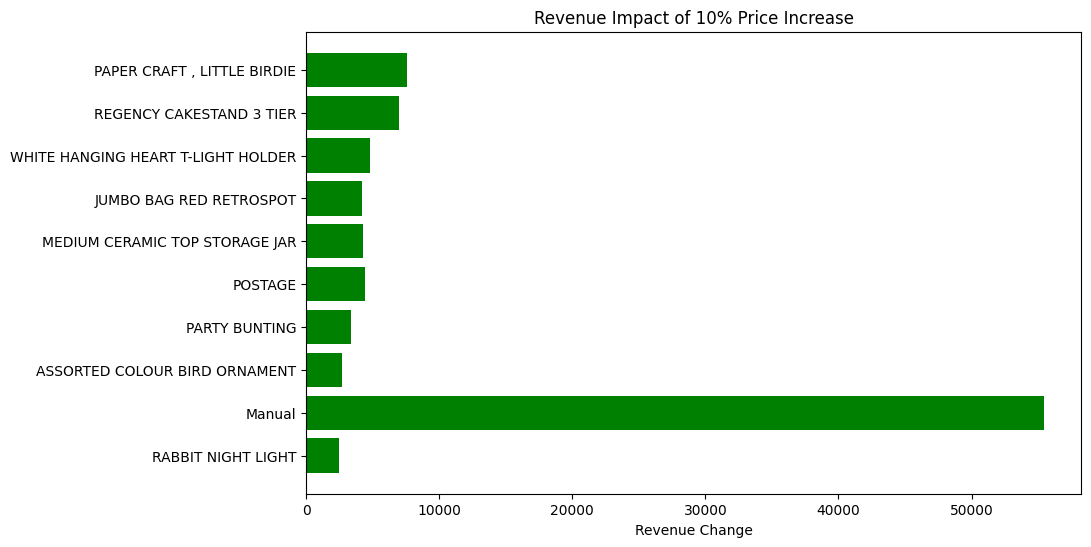

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(sim_df['Product'], sim_df['Revenue Change'], color='green')
plt.xlabel('Revenue Change')
plt.title('Revenue Impact of 10% Price Increase')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df[df['Description']=='Manual'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,18.95
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,5.04
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,30.60


In [ ]:
sim_df = sim_df[sim_df['Product'] != 'Manual']

In [ ]:
sim_df.to_csv('pricing_simulation_clean.csv', index=False)

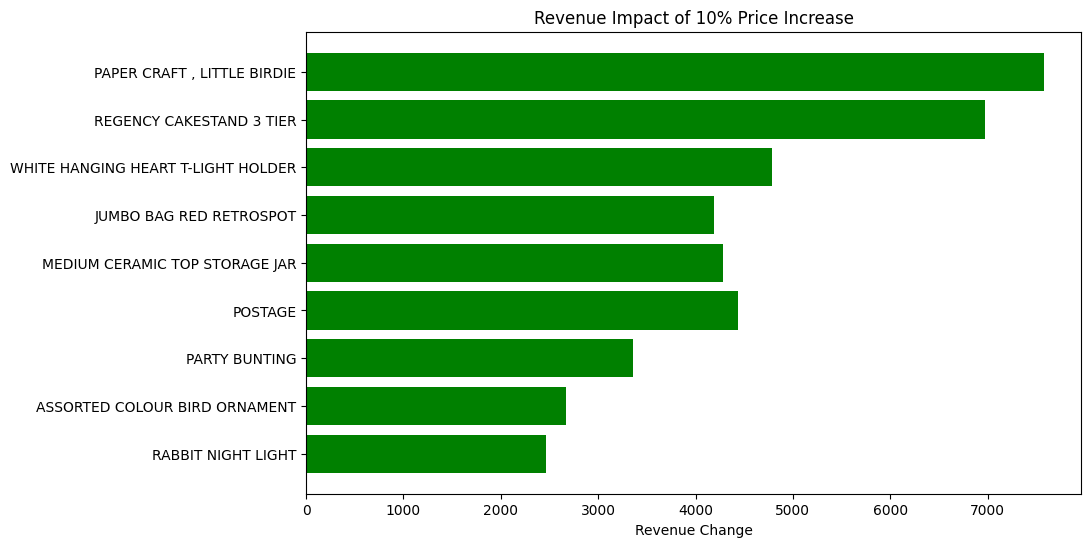

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(sim_df['Product'], sim_df['Revenue Change'], color='green')
plt.xlabel('Revenue Change')
plt.title('Revenue Impact of 10% Price Increase')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
sim_df.to_excel('pricing_simulation_results.xlsx', index=False)

# New Section